In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from ast import literal_eval

In [ ]:
save = False

if save:
    sns.set(font_scale=1.8)


In [ ]:
ted_talks = pd.read_csv("../data/ted_talks_selected.csv")
ted_talks

In [ ]:
ted_talks.describe()

# Les plus vus

In [ ]:
most_viewed = ted_talks[["title", "views"]].sort_values(by='views', ascending=False).head(10).reset_index(drop=True)
most_viewed

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x=list(range(10)), y=most_viewed.views)
plt.title("Les 10 conférences les plus vues")
plt.xlabel("Conférence")
plt.ylabel("Nombre de vues")
if save: plt.savefig("../data/graphs/most_viewed.png")
plt.show()

# Durées

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(ted_talks.duration / 60)
plt.title("Durée des conférences en minutes")
plt.xlabel("Durée (minutes)")
plt.ylabel("Nombre de conférences")
if save: plt.savefig("../data/graphs/duration.png")
plt.show()

# Corrélations

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(ted_talks.drop("talk_id", axis=1).corr(), mask=np.eye(3), annot=True, cmap="RdBu", center=0)
plt.title("Corrélations entre les variables numériques")
if save: plt.savefig("../data/graphs/correlations.png")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=ted_talks.views, y=ted_talks.comments)
plt.title("Nombre de commentaires selon le nombre de vues")
plt.xlabel("Nombre de vues")
plt.ylabel("Nombre de commentaires")
if save: plt.savefig("../data/graphs/comments_views.png")
plt.show()

# Thèmes à débat

In [ ]:
ted_talks["comment_rate"] = ted_talks.comments / ted_talks.views * 1e6

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(ted_talks["comment_rate"])
plt.title("Ratio commentaires / vues")
plt.xlabel("Ratio")
plt.ylabel("Compte")
if save: plt.savefig("../data/graphs/comment_rate.png")
plt.show()

In [ ]:
most_commented_topics = ted_talks.sort_values(by="comment_rate", ascending=False).topics.head(100)

most_commented_topics = most_commented_topics.apply(lambda x: literal_eval(x)).explode().value_counts()

most_commented_topics = most_commented_topics[most_commented_topics > 10]

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x=most_commented_topics, y=most_commented_topics.index)
plt.title("Thèmes les plus débattus")
plt.xlabel("Nombre d'apparitions du thème dans les 100 conférences les plus débattues")
if save: plt.savefig("../data/graphs/debated_topics.png")
plt.show()

# Thèmes les plus vus

In [ ]:
most_viewed_topics = ted_talks.sort_values(by="views", ascending=False).topics.head(100)

most_viewed_topics = most_viewed_topics.apply(lambda x: literal_eval(x)).explode().value_counts()

most_viewed_topics = most_viewed_topics[most_viewed_topics > 10]

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x=most_commented_topics, y=most_commented_topics.index)
plt.title("Thèmes les plus vus")
plt.xlabel("Nombre d'apparitions du thème dans les 100 conférences les plus vues")
if save: plt.savefig("../data/graphs/viewed_topics.png")
plt.show()

# Orateurs

In [ ]:
plt.figure(figsize=(10, 6))

frequent_speakers = ted_talks.speaker_1.value_counts().head(10)

sns.barplot(x=frequent_speakers, y=frequent_speakers.index)
plt.title("Orateurs les plus actifs")
plt.xlabel("Nombre de conférences réalisées")
if save: plt.savefig("../data/graphs/speakers.png")
plt.show()

In [ ]:
most_common_occupations = ted_talks.occupations.apply(lambda x: literal_eval(x)[0] if pd.notna(x) else x).explode().value_counts()[1:].head(10)

plt.figure(figsize=(10, 6))

sns.barplot(x=most_common_occupations, y=most_common_occupations.index)
plt.title("Métiers les plus fréquents")
plt.xlabel("Nombre d'apparitions du métier dans les conférences")
if save: plt.savefig("../data/graphs/frequent_occupations.png")
plt.show()

In [ ]:
ted_talks.recorded_date = ted_talks.apply(lambda x: x.recorded_date if pd.notnull(x.recorded_date) else x.published_date, axis=1)
ted_talks.recorded_date = pd.to_datetime(ted_talks.recorded_date)

talks_by_year = ted_talks.recorded_date.dt.year.value_counts()
# talks_by_year = talks_by_year[talks_by_year.index < 2020]

plt.figure(figsize=(10, 6))

sns.lineplot(x=talks_by_year.index, y=talks_by_year)
plt.title("Évolution du nombre de conférences dans le temps")
plt.xlabel("Années")
plt.ylabel("Nombre de conférences annuelles")
if save: plt.savefig("../data/graphs/talks_evolution.png")
plt.show()

In [ ]:
talks_by_month = ted_talks.recorded_date.dt.month.value_counts().sort_index()
months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]

plt.figure(figsize=(12, 8))

sns.barplot(x=months, y=talks_by_month)
plt.xticks(rotation=45)
plt.title("Distribution des conférences au cours des mois")
plt.xlabel("Mois de l'année")
plt.ylabel("Nombre de conférences mensuelles")
if save: plt.savefig("../data/graphs/months_talks.png")
plt.show()

In [ ]:
ted_talks["recorded_month"] = ted_talks.recorded_date.dt.month

views_by_months = ted_talks.groupby("recorded_month").sum()["views"]

plt.figure(figsize=(12, 8))

sns.barplot(x=months, y=views_by_months)
plt.xticks(rotation=45)
plt.title("Nombre de vues selon le mois de l'année")
plt.xlabel("Mois de l'année")
plt.ylabel("Nombre de vues")
if save: plt.savefig("../data/graphs/months_views.png")
plt.show()

In [ ]:
talks_by_year_month = ted_talks.groupby(pd.Grouper(key="recorded_date", freq="M")).count()["talk_id"]
talks_by_year_month = talks_by_year_month[talks_by_year_month.index.year > 1996]
talks_by_year_month

In [ ]:
years = talks_by_year_month.index.year.unique()

df_year_month = []

for year in years:
    to_append = list(talks_by_year_month[talks_by_year_month.index.year == year])
    if year == 1984:
        to_append = [0] + to_append
    df_year_month.append(to_append)

df_year_month = pd.DataFrame(df_year_month, columns=months)
df_year_month.index = years
df_year_month.fillna(0, inplace=True)

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(pd.DataFrame(df_year_month), cmap="RdBu", center=0)
plt.title("Évolution du nombre de conférences au cours des mois")
plt.xlabel("Mois de l'année")
plt.ylabel("Années")
if save: plt.savefig("../data/graphs/year_month_evolution.png")
plt.show()

# Boxplots

In [ ]:
sns.boxplot(x=ted_talks.views)
plt.show()

In [ ]:
sns.boxplot(x=ted_talks.duration / 60)
plt.show()

In [ ]:
sns.boxplot(x=ted_talks.comments)
plt.show()

# Thèmes

In [ ]:
# Source : https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
def boolean_df(item_lists, unique_items):
    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [ ]:
def evaluate(x):
    if pd.isna(x):
        return x
    return literal_eval(x)

ted_talks.topics = ted_talks.topics.apply(evaluate)

In [ ]:
one_hot_topics = boolean_df(ted_talks.topics, ted_talks.topics.explode().unique())
one_hot_topics["year"] = ted_talks.recorded_date.dt.year
one_hot_topics

In [ ]:
most_talked_ted = ted_talks.topics.explode().value_counts().head(12).index
most_talked = most_talked_ted.drop(["TED-Ed", "TEDx"])
most_talked

In [ ]:
top_topics_by_year = one_hot_topics.groupby("year").sum()[most_talked]
top_topics_by_year = top_topics_by_year[(top_topics_by_year.index >= 2010) & (top_topics_by_year.index != 2020)]
top_topics_by_year.index = pd.to_datetime(top_topics_by_year.index, format="%Y")
top_topics_by_year

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(top_topics_by_year)
plt.title("Evolution de la popularité des thèmes en fonction des années")
plt.xlabel("Année")
plt.xticks(rotation=45)
plt.ylabel("Nombre de conférences")
plt.legend(top_topics_by_year.columns,fontsize = 19, ncol = 2) 
if save: plt.savefig("../data/graphs/topics_evolution.png")
plt.plot()

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(one_hot_topics[most_talked].corr(),
            mask=np.tril(np.ones((10,10))).T, cmap="RdBu", center=0, annot=True)
plt.title("Corrélation entre les thèmes")
if save: plt.savefig("../data/graphs/topics_correlation.png")
plt.show()

## Nombres de métiers représentés dans les thèmes les plus populaires

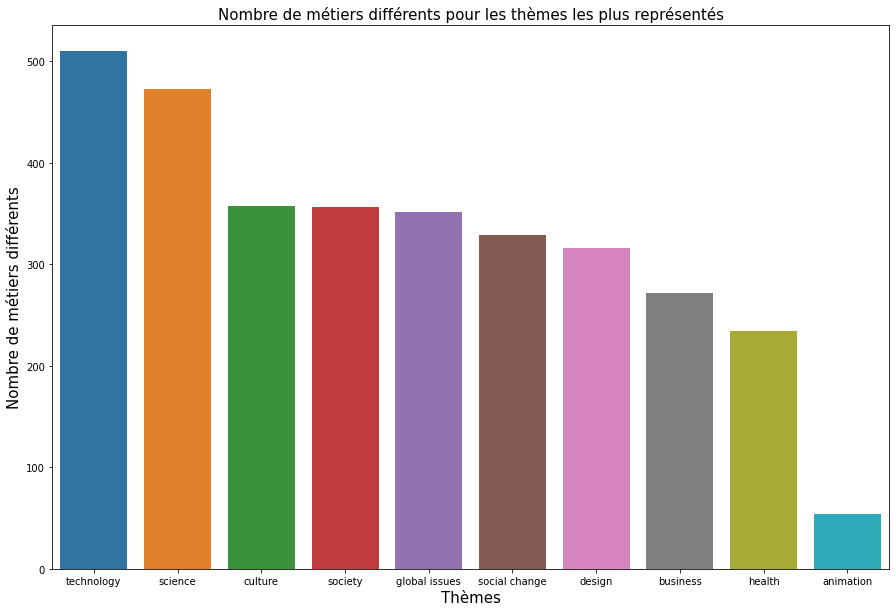

In [34]:
index_popular_topic = top_topics_by_year.columns
index_popular_topic

df_pop_occ = ted_talks[["occupations", "topics"]]

col1 = df_pop_occ.occupations.apply(lambda x : literal_eval(x)[0] if pd.notnull(x) else x ).dropna().explode()

df_pop_occ = df_pop_occ.copy().iloc[col1.index]

df_pop_occ["occ0"] = col1.values

df_pop_occ.drop("occupations", axis = 1, inplace = True)

col2 = df_pop_occ.topics.dropna().explode()

df_pop_occ = df_pop_occ.copy().iloc[col2.index]

df_pop_occ["top"] = col2.values

df_pop_occ.drop("topics", axis = 1, inplace = True)

df_pop_occ.drop_duplicates(inplace = True)

df_pop_occ_counted = df_pop_occ.groupby("top").count().loc[index_popular_topic]

df_pop_occ_counted.sort_values(by = "occ0", ascending = False, inplace = True)

df_pop_occ_counted

plt.figure(figsize=(15, 10))

sns.barplot(x = df_pop_occ_counted.index, y=df_pop_occ_counted.values.reshape(1,-1)[0])
plt.title("Nombre de métiers différents pour les thèmes les plus représentés", fontsize=15)
plt.xlabel("Thèmes", fontsize=15)
plt.ylabel("Nombre de métiers différents", fontsize=15)
plt.show()